## Work

請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等




請同學將前三日的 Regularization 方式加以組合，並觀察對訓練造成的影響

- ## <font color="red">Regularizers : 隱藏層內的 L1 / L2 正規化</font>

- ## <font color="red">Dropout : 隨機省略神經元輸出的正規化</font>

- ## <font color="red">Batch-normalization : 傳遞時神經元橫向平衡的正規化</font>

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
Regularizers : 隱藏層內的 L1 / L2 正規化
Dropout : 隨機省略神經元輸出的正規化
Batch-normalization : 傳遞時神經元橫向平衡的正規化
"""

from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4, drp_ratio=0.2):
    
    # input layer
    input_layer = keras.layers.Input(input_shape)
    
    # hidden layer
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer) # regularization
            
            x = Dropout(drp_ratio)(x) # Dropput
            x = BatchNormalization()(x) # BatchNormalization
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x) # regularization
            x = Dropout(drp_ratio)(x) # Dropput
            x = BatchNormalization()(x) # BatchNormalization
    
    # output layer
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0, 0.25, 0.5]
L2_EXP = [0, 1e-2, 1e-4]

W0723 23:45:26.711117 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 23:45:26.749237 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 23:45:26.761111 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 23:45:26.897324 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.p

Experiment with Regulizer = 0.000000, and Dropout = 0.000000


W0723 23:45:27.171107 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 23:45:27.182395 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

W0723 23:45:27.386374 4564010432 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8806 - acc: 0.3573 - val_loss: 1.7255 - val_acc: 0.3965
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5529 - acc: 0.4555 - val_loss: 1.6548 - val_acc: 0.4109
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4517 - acc: 0.4914 - val_loss: 1.6829 - val_acc: 0.4101
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3817 - acc: 0.5139 - val_loss: 1.5129 - val_acc: 0.4678
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3178 - acc: 0.5387 - val_loss: 1.5151 - val_acc: 0.4695
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2658 - acc: 0.5562 - val_loss: 1.5070 - val_acc: 0.4677
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2159 - acc: 0.5752 - val_loss: 1.4740 - 

W0723 23:51:17.617793 4564010432 deprecation.py:506] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Experiment with Regulizer = 0.000000, and Dropout = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normaliza

50000/50000 [==============================] - 7s 147us/step - loss: 1.6362 - acc: 0.4099 - val_loss: 1.5209 - val_acc: 0.4521
Epoch 42/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6343 - acc: 0.4109 - val_loss: 1.5370 - val_acc: 0.4430
Epoch 43/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6306 - acc: 0.4074 - val_loss: 1.5089 - val_acc: 0.4636
Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6216 - acc: 0.4147 - val_loss: 1.5078 - val_acc: 0.4521
Epoch 45/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6205 - acc: 0.4143 - val_loss: 1.5337 - val_acc: 0.4420
Epoch 46/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6154 - acc: 0.4196 - val_loss: 1.4990 - val_acc: 0.4634
Epoch 47/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6111 - acc: 0.4155 - val_loss: 1.4959 - val_acc: 0.4682
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 7s 148us/step - loss: 1.7760 - acc: 0.4356 - val_loss: 1.7677 - val_acc: 0.4314
Epoch 32/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7436 - acc: 0.4462 - val_loss: 1.6995 - val_acc: 0.4548
Epoch 33/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7428 - acc: 0.4399 - val_loss: 1.6683 - val_acc: 0.4692
Epoch 34/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7268 - acc: 0.4435 - val_loss: 1.6756 - val_acc: 0.4532
Epoch 35/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7096 - acc: 0.4440 - val_loss: 1.6583 - val_acc: 0.4583
Epoch 36/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7094 - acc: 0.4428 - val_loss: 1.6553 - val_acc: 0.4569
Epoch 37/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6922 - acc: 0.4450 - val_loss: 1.6838 - val_acc: 0.4497
Epoch 38/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 0.8657 - acc: 0.7519 - val_loss: 1.8206 - val_acc: 0.4599
Epoch 22/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8439 - acc: 0.7608 - val_loss: 1.8932 - val_acc: 0.4494
Epoch 23/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.8175 - acc: 0.7709 - val_loss: 1.9318 - val_acc: 0.4536
Epoch 24/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7888 - acc: 0.7796 - val_loss: 1.8248 - val_acc: 0.4873
Epoch 25/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.7571 - acc: 0.7932 - val_loss: 1.8802 - val_acc: 0.4817
Epoch 26/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.7301 - acc: 0.8019 - val_loss: 1.9184 - val_acc: 0.4661
Epoch 27/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7029 - acc: 0.8122 - val_loss: 1.9794 - val_acc: 0.4692
Epoch 28/50
50000/50000 [==============

50000/50000 [==============================] - 7s 142us/step - loss: 1.9443 - acc: 0.3400 - val_loss: 1.8388 - val_acc: 0.3871
Epoch 12/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.9292 - acc: 0.3496 - val_loss: 1.8131 - val_acc: 0.3955
Epoch 13/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.9173 - acc: 0.3546 - val_loss: 1.8040 - val_acc: 0.3933
Epoch 14/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9059 - acc: 0.3572 - val_loss: 1.7935 - val_acc: 0.4031
Epoch 15/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.8965 - acc: 0.3630 - val_loss: 1.7774 - val_acc: 0.4052
Epoch 16/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8927 - acc: 0.3652 - val_loss: 1.7789 - val_acc: 0.4029
Epoch 17/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.8906 - acc: 0.3627 - val_loss: 1.7747 - val_acc: 0.4048
Epoch 18/50
50000/50000 [==============

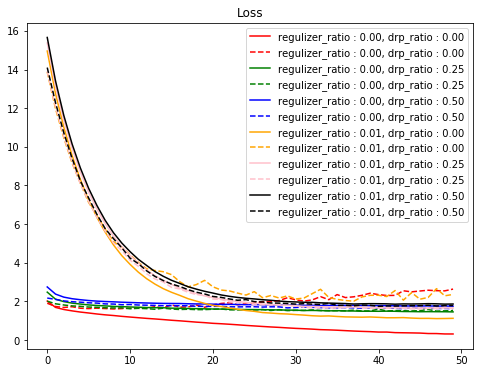

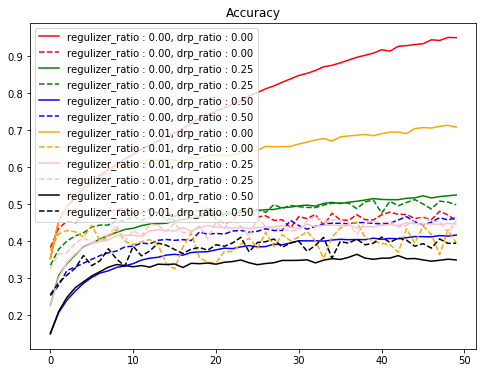

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define results
results = {}
for regulizer_ratio in L2_EXP :
    for dropout in Dropout_EXP :
#         keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.6f, and Dropout = %.6f" % (regulizer_ratio, dropout))
    
        model = build_mlp(input_shape=x_train.shape[1:], l2_ratio = regulizer_ratio, drp_ratio = dropout)
        model.summary()

#       optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = 'regulizer_ratio : %.2f, drp_ratio : %.2f' % (regulizer_ratio, dropout)
        results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc' : train_acc,
                             'valid-acc' : valid_acc}
        
# plot
# 因為 len(results.keys()) == 9 ，所以 color_bar 要 9 colors --> color hex
color_bar = ["r", "g", "b", "orange", "pink", 
             "k", "#271e17", "#44929b", "#f2a343"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()


## 看過 ANS 後改一版

Numbers of exp: 0, with bn: True, drp_ratio: 0.00, l2_ratio: 0.00
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_norm

50000/50000 [==============================] - 7s 150us/step - loss: 0.2234 - acc: 0.9346 - val_loss: 2.3376 - val_acc: 0.4620
Epoch 47/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.2116 - acc: 0.9393 - val_loss: 2.4362 - val_acc: 0.4671
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.2017 - acc: 0.9421 - val_loss: 2.3612 - val_acc: 0.4720
Epoch 49/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.1885 - acc: 0.9478 - val_loss: 2.5787 - val_acc: 0.4631
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.1733 - acc: 0.9522 - val_loss: 2.5050 - val_acc: 0.4600
Numbers of exp: 1, with bn: True, drp_ratio: 0.00, l2_ratio: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_____________________________________________________

50000/50000 [==============================] - 7s 148us/step - loss: 1.1786 - acc: 0.6905 - val_loss: 2.2052 - val_acc: 0.4195
Epoch 42/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.1779 - acc: 0.6923 - val_loss: 2.3656 - val_acc: 0.3897
Epoch 43/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.1671 - acc: 0.6930 - val_loss: 2.2693 - val_acc: 0.4258
Epoch 44/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.1524 - acc: 0.7002 - val_loss: 2.5039 - val_acc: 0.3911
Epoch 45/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.1384 - acc: 0.7033 - val_loss: 2.5230 - val_acc: 0.3920
Epoch 46/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.1534 - acc: 0.6975 - val_loss: 2.2152 - val_acc: 0.4217
Epoch 47/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.1353 - acc: 0.7040 - val_loss: 2.1018 - val_acc: 0.4346
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 7s 141us/step - loss: 0.4950 - acc: 0.8873 - val_loss: 2.1919 - val_acc: 0.4679
Epoch 37/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.4739 - acc: 0.8943 - val_loss: 2.3078 - val_acc: 0.4651 0s - loss: 0.4691 - a - ETA: 0s - loss: 0.4722 - acc: 0
Epoch 38/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.4584 - acc: 0.9022 - val_loss: 2.4012 - val_acc: 0.4553
Epoch 39/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.4428 - acc: 0.9074 - val_loss: 2.3326 - val_acc: 0.4629
Epoch 40/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.4329 - acc: 0.9103 - val_loss: 2.3247 - val_acc: 0.4713
Epoch 41/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.4105 - acc: 0.9180 - val_loss: 2.3593 - val_acc: 0.4601
Epoch 42/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.3966 - acc: 0.9219 - val_loss: 2.4169 -

Epoch 31/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.4010 - acc: 0.4988 - val_loss: 1.3875 - val_acc: 0.4926
Epoch 32/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3937 - acc: 0.4990 - val_loss: 1.3898 - val_acc: 0.49771.39
Epoch 33/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.3928 - acc: 0.5000 - val_loss: 1.3868 - val_acc: 0.5000
Epoch 34/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.3911 - acc: 0.4996 - val_loss: 1.4487 - val_acc: 0.4876
Epoch 35/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3862 - acc: 0.4986 - val_loss: 1.3849 - val_acc: 0.5006
Epoch 36/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.3804 - acc: 0.5041 - val_loss: 1.4039 - val_acc: 0.4962
Epoch 37/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.3800 - acc: 0.5036 - val_loss: 1.4215 - val_acc: 0.4839
Epoch 38/50
50000/50000

50000/50000 [==============================] - 7s 139us/step - loss: 1.9007 - acc: 0.4404 - val_loss: 1.8319 - val_acc: 0.4532
Epoch 27/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8642 - acc: 0.4377 - val_loss: 1.8815 - val_acc: 0.4320
Epoch 28/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8193 - acc: 0.4431 - val_loss: 1.8368 - val_acc: 0.4344
Epoch 29/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7851 - acc: 0.4497 - val_loss: 1.7944 - val_acc: 0.4287
Epoch 30/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.7815 - acc: 0.4433 - val_loss: 1.8596 - val_acc: 0.4022
Epoch 31/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7529 - acc: 0.4455 - val_loss: 1.7602 - val_acc: 0.4361
Epoch 32/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7386 - acc: 0.4447 - val_loss: 1.7852 - val_acc: 0.4281
Epoch 33/50
50000/50000 [=============

50000/50000 [==============================] - 7s 137us/step - loss: 1.6091 - acc: 0.4709 - val_loss: 1.5723 - val_acc: 0.4817
Epoch 22/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6056 - acc: 0.4715 - val_loss: 1.5571 - val_acc: 0.4903
Epoch 23/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6028 - acc: 0.4732 - val_loss: 1.5700 - val_acc: 0.4915
Epoch 24/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5968 - acc: 0.4737 - val_loss: 1.5490 - val_acc: 0.4969
Epoch 25/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5915 - acc: 0.4767 - val_loss: 1.5564 - val_acc: 0.4926
Epoch 26/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5800 - acc: 0.4810 - val_loss: 1.5553 - val_acc: 0.4942
Epoch 27/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5822 - acc: 0.4802 - val_loss: 1.5911 - val_acc: 0.4842
Epoch 28/50
50000/50000 [==============

50000/50000 [==============================] - 7s 131us/step - loss: 1.7505 - acc: 0.3631 - val_loss: 1.6323 - val_acc: 0.4126
Epoch 17/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7435 - acc: 0.3668 - val_loss: 1.6137 - val_acc: 0.4243
Epoch 18/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7420 - acc: 0.3695 - val_loss: 1.6290 - val_acc: 0.4121
Epoch 19/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.7428 - acc: 0.3682 - val_loss: 1.6049 - val_acc: 0.4164
Epoch 20/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7297 - acc: 0.3755 - val_loss: 1.6056 - val_acc: 0.4187
Epoch 21/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7146 - acc: 0.3795 - val_loss: 1.5891 - val_acc: 0.4292
Epoch 22/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.7155 - acc: 0.3799 - val_loss: 1.5887 - val_acc: 0.4276
Epoch 23/50
50000/50000 [==============

50000/50000 [==============================] - 8s 150us/step - loss: 4.5878 - acc: 0.3227 - val_loss: 4.2990 - val_acc: 0.3521
Epoch 12/50
50000/50000 [==============================] - 7s 140us/step - loss: 4.1774 - acc: 0.3327 - val_loss: 3.8714 - val_acc: 0.3958
Epoch 13/50
50000/50000 [==============================] - 7s 131us/step - loss: 3.8422 - acc: 0.3345 - val_loss: 3.6082 - val_acc: 0.3642
Epoch 14/50
50000/50000 [==============================] - 7s 132us/step - loss: 3.5543 - acc: 0.3352 - val_loss: 3.3486 - val_acc: 0.3748
Epoch 15/50
50000/50000 [==============================] - 7s 131us/step - loss: 3.3189 - acc: 0.3318 - val_loss: 3.0901 - val_acc: 0.3968
Epoch 16/50
50000/50000 [==============================] - 7s 130us/step - loss: 3.1326 - acc: 0.3257 - val_loss: 2.9734 - val_acc: 0.3425
Epoch 17/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.9590 - acc: 0.3207 - val_loss: 2.7736 - val_acc: 0.3842
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 7s 142us/step - loss: 2.0476 - acc: 0.3010 - val_loss: 1.9432 - val_acc: 0.3418
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.0178 - acc: 0.3124 - val_loss: 1.9086 - val_acc: 0.3591
Epoch 8/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.9981 - acc: 0.3231 - val_loss: 1.8764 - val_acc: 0.3694
Epoch 9/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.9753 - acc: 0.3292 - val_loss: 1.8580 - val_acc: 0.3711
Epoch 10/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.9551 - acc: 0.3381 - val_loss: 1.8370 - val_acc: 0.3855
Epoch 11/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.9416 - acc: 0.3421 - val_loss: 1.8306 - val_acc: 0.3843
Epoch 12/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.9314 - acc: 0.3477 - val_loss: 1.8101 - val_acc: 0.3911
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 7s 148us/step - loss: 2.8790 - acc: 0.1001 - val_loss: 2.3008 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.5858 - acc: 0.1057 - val_loss: 2.2911 - val_acc: 0.1324
Epoch 3/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.4239 - acc: 0.1158 - val_loss: 2.2947 - val_acc: 0.1004
Epoch 4/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.3344 - acc: 0.1279 - val_loss: 2.2967 - val_acc: 0.1018
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2806 - acc: 0.1370 - val_loss: 2.2891 - val_acc: 0.1116
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.2390 - acc: 0.1489 - val_loss: 2.2857 - val_acc: 0.1191
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2066 - acc: 0.1570 - val_loss: 2.2855 - val_acc: 0.1216
Epoch 8/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 149us/step - loss: 15.8851 - acc: 0.1048 - val_loss: 14.3612 - val_acc: 0.1030
Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 13.7194 - acc: 0.1123 - val_loss: 12.6146 - val_acc: 0.0941
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 11.9425 - acc: 0.1199 - val_loss: 11.1291 - val_acc: 0.1020
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 10.4462 - acc: 0.1367 - val_loss: 9.8505 - val_acc: 0.1031
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 9.1961 - acc: 0.1512 - val_loss: 8.7413 - val_acc: 0.1152
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 8.1304 - acc: 0.1629 - val_loss: 7.7860 - val_acc: 0.1258
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 7.2375 - acc: 0.1695 - val_loss: 6.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 150us/step - loss: 3.0099 - acc: 0.1047 - val_loss: 2.4512 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.7134 - acc: 0.1112 - val_loss: 2.4467 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.5504 - acc: 0.1234 - val_loss: 2.4602 - val_acc: 0.0998
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.4616 - acc: 0.1321 - val_loss: 2.4559 - val_acc: 0.1158
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.3956 - acc: 0.1456 - val_loss: 2.4498 - val_acc: 0.1173
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.3544 - acc: 0.1568 - val_loss: 2.4393 - val_acc: 0.1260
Epoch 7/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.3269 - acc: 0.1625 - val_loss: 2.4310 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0172 - acc: 0.2844 - val_loss: 1.8667 - val_acc: 0.3409
Epoch 2/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8072 - acc: 0.3680 - val_loss: 1.7584 - val_acc: 0.3873
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7226 - acc: 0.3991 - val_loss: 1.6869 - val_acc: 0.4152
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6626 - acc: 0.4200 - val_loss: 1.6436 - val_acc: 0.4206
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6158 - acc: 0.4364 - val_loss: 1.6232 - val_acc: 0.4330
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5749 - acc: 0.4502 - val_loss: 1.5791 - val_acc: 0.4400
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5405 - acc: 0.4609 - val_loss: 1.5395 - val_ac

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 118us/step - loss: 15.0854 - acc: 0.2729 - val_loss: 13.9517 - val_acc: 0.3415
Epoch 2/50
50000/50000 [==============================] - 5s 102us/step - loss: 13.0194 - acc: 0.3609 - val_loss: 12.1311 - val_acc: 0.3734
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 11.3472 - acc: 0.3844 - val_loss: 10.5981 - val_acc: 0.3907
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 9.9332 - acc: 0.3994 - val_loss: 9.2988 - val_acc: 0.4043
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 8.7314 - acc: 0.4087 - val_loss: 8.1927 - val_acc: 0.4108
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 7.7076 - acc: 0.4167 - val_loss: 7.2426 - val_acc: 0.4201
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 6.8343 - acc: 0.4255 - val_loss: 6.4

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.1805 - acc: 0.2726 - val_loss: 2.0105 - val_acc: 0.3446
Epoch 2/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.9511 - acc: 0.3670 - val_loss: 1.9055 - val_acc: 0.3795
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8668 - acc: 0.3952 - val_loss: 1.8372 - val_acc: 0.4019
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8080 - acc: 0.4154 - val_loss: 1.7972 - val_acc: 0.4114
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7602 - acc: 0.4340 - val_loss: 1.7741 - val_acc: 0.4213
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7214 - acc: 0.4440 - val_loss: 1.7174 - val_acc: 0.4401
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6875 - acc: 0.4552 - val_loss: 1.7076 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.1837 - acc: 0.1869 - val_loss: 1.9737 - val_acc: 0.3003
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9888 - acc: 0.2749 - val_loss: 1.8663 - val_acc: 0.3438
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9077 - acc: 0.3122 - val_loss: 1.8021 - val_acc: 0.3634
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8511 - acc: 0.3357 - val_loss: 1.7520 - val_acc: 0.3865
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8105 - acc: 0.3509 - val_loss: 1.7094 - val_acc: 0.3995
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7717 - acc: 0.3648 - val_loss: 1.6744 - val_acc: 0.4102
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7428 - acc: 0.3771 - val_loss: 1.6443 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 129us/step - loss: 15.2163 - acc: 0.1832 - val_loss: 14.0539 - val_acc: 0.2942
Epoch 2/50
50000/50000 [==============================] - 6s 120us/step - loss: 13.1673 - acc: 0.2600 - val_loss: 12.2089 - val_acc: 0.3156
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 11.4774 - acc: 0.2961 - val_loss: 10.6574 - val_acc: 0.3495
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 10.0498 - acc: 0.3168 - val_loss: 9.3458 - val_acc: 0.3611
Epoch 5/50
50000/50000 [==============================] - 6s 122us/step - loss: 8.8394 - acc: 0.3348 - val_loss: 8.2285 - val_acc: 0.3746
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 7.8124 - acc: 0.3432 - val_loss: 7.2824 - val_acc: 0.3777
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 6.9313 - acc: 0.3512 - val_loss: 6.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.3471 - acc: 0.1796 - val_loss: 2.1468 - val_acc: 0.3006
Epoch 2/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1479 - acc: 0.2634 - val_loss: 2.0104 - val_acc: 0.3405
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.0514 - acc: 0.3072 - val_loss: 1.9363 - val_acc: 0.3665
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9926 - acc: 0.3324 - val_loss: 1.8805 - val_acc: 0.3827
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9487 - acc: 0.3508 - val_loss: 1.8485 - val_acc: 0.3992
Epoch 6/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9146 - acc: 0.3642 - val_loss: 1.8104 - val_acc: 0.4092
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.8823 - acc: 0.3734 - val_loss: 1.7819 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.3259 - acc: 0.1295 - val_loss: 2.2020 - val_acc: 0.2230
Epoch 2/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1926 - acc: 0.1739 - val_loss: 2.0778 - val_acc: 0.2551
Epoch 3/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1172 - acc: 0.2076 - val_loss: 2.0057 - val_acc: 0.2876
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0662 - acc: 0.2286 - val_loss: 1.9557 - val_acc: 0.3102
Epoch 5/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.0246 - acc: 0.2481 - val_loss: 1.9051 - val_acc: 0.3309
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9890 - acc: 0.2677 - val_loss: 1.8726 - val_acc: 0.3400
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9641 - acc: 0.2770 - val_loss: 1.8394 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 127us/step - loss: 15.3440 - acc: 0.1357 - val_loss: 14.2343 - val_acc: 0.2173
Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 13.3291 - acc: 0.1870 - val_loss: 12.3560 - val_acc: 0.2616
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 11.6348 - acc: 0.2117 - val_loss: 10.8000 - val_acc: 0.2895
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 10.1949 - acc: 0.2370 - val_loss: 9.4686 - val_acc: 0.3124
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 8.9773 - acc: 0.2557 - val_loss: 8.3446 - val_acc: 0.3271
Epoch 6/50
50000/50000 [==============================] - 6s 123us/step - loss: 7.9398 - acc: 0.2694 - val_loss: 7.3868 - val_acc: 0.3355
Epoch 7/50
50000/50000 [==============================] - 6s 122us/step - loss: 7.0555 - acc: 0.2836 - val_loss: 6.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.4495 - acc: 0.1332 - val_loss: 2.3285 - val_acc: 0.2464
Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3237 - acc: 0.1773 - val_loss: 2.2084 - val_acc: 0.2743
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2458 - acc: 0.2098 - val_loss: 2.1336 - val_acc: 0.3034
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.1955 - acc: 0.2321 - val_loss: 2.0795 - val_acc: 0.3145
Epoch 5/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.1521 - acc: 0.2498 - val_loss: 2.0323 - val_acc: 0.3332
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1205 - acc: 0.2669 - val_loss: 2.0065 - val_acc: 0.3375
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0953 - acc: 0.2760 - val_loss: 1.9831 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.4513 - acc: 0.0973 - val_loss: 2.3025 - val_acc: 0.1006
Epoch 2/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3032 - acc: 0.0991 - val_loss: 2.3025 - val_acc: 0.1025
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3032 - acc: 0.0973 - val_loss: 2.3025 - val_acc: 0.1031
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.3031 - acc: 0.1003 - val_loss: 2.3025 - val_acc: 0.1019
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3029 - acc: 0.0989 - val_loss: 2.3025 - val_acc: 0.1014
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3026 - acc: 0.0973 - val_loss: 2.3025 - val_acc: 0.1015
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3028 - acc: 0.0994 - val_loss: 2.3025 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 15.4803 - acc: 0.0947 - val_loss: 14.3344 - val_acc: 0.0999
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 13.4398 - acc: 0.1036 - val_loss: 12.5760 - val_acc: 0.0997
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 11.8121 - acc: 0.1016 - val_loss: 11.0745 - val_acc: 0.1361
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 10.4219 - acc: 0.1048 - val_loss: 9.7923 - val_acc: 0.1241
Epoch 5/50
50000/50000 [==============================] - 7s 130us/step - loss: 9.2352 - acc: 0.1033 - val_loss: 8.6979 - val_acc: 0.1286
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 8.2217 - acc: 0.1157 - val_loss: 7.7630 - val_acc: 0.1425
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 7.3559 - acc: 0.1209 - val_loss: 6.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.5748 - acc: 0.1051 - val_loss: 2.4411 - val_acc: 0.1060
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.4417 - acc: 0.1031 - val_loss: 2.4408 - val_acc: 0.1065
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4415 - acc: 0.1012 - val_loss: 2.4406 - val_acc: 0.1109
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.4408 - acc: 0.1029 - val_loss: 2.4402 - val_acc: 0.1191
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.4403 - acc: 0.1009 - val_loss: 2.4402 - val_acc: 0.1088
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4404 - acc: 0.1008 - val_loss: 2.4399 - val_acc: 0.1076
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.4403 - acc: 0.1040 - val_loss: 2.4396 - 

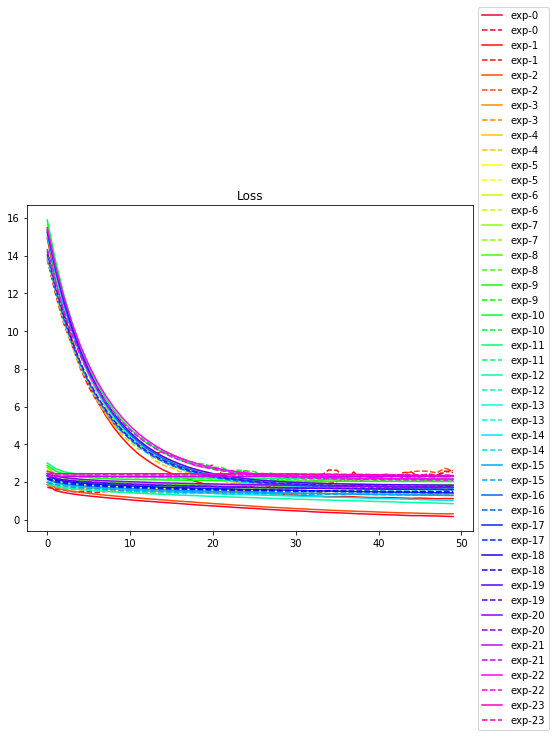

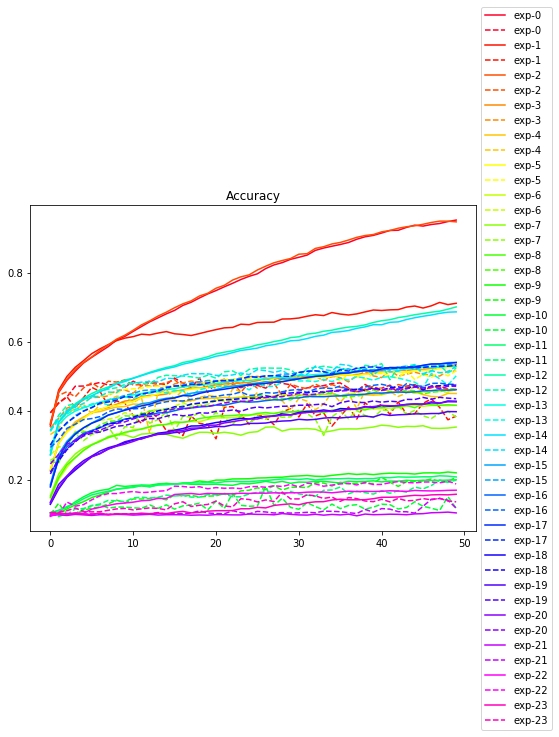

In [4]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""


train, test = keras.datasets.cifar10.load_data()


## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    



x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)




"""
Regularizers : 隱藏層內的 L1 / L2 正規化
Dropout : 隨機省略神經元輸出的正規化
Batch-normalization : 傳遞時神經元橫向平衡的正規化
"""
# from keras.layers import BatchNormalization, Activation, Dropout, regularizers
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], use_bn=True, drp_ratio=0, l2_ratio=0):
    
    # input layer
    input_layer = keras.layers.Input(input_shape)
    
    # hidden layer
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer) # regularization
            
            x = Dropout(drp_ratio)(x) # Dropput
            if use_bn:
                x = BatchNormalization()(x) # BatchNormalization
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x) # regularization
            x = Dropout(drp_ratio)(x) # Dropput
            if use_bn:
                x = BatchNormalization()(x) # BatchNormalization
    
    # output layer
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256

MOMENTUM = 0.95

"""
建立實驗組合
"""
USE_BN = [True, False]
DRP_RATIO = [0, 0.25, 0.5, 0.8]
L2_RATIO = [0, 1e-2, 1e-4]






# Collect results
import keras.backend as K

"""
以迴圈方式遍歷組合來訓練模型
"""
results = {}
for i, (use_bn, drp_ratio, l2_ratio) in enumerate(itertools.product(USE_BN, DRP_RATIO, L2_RATIO)):
    
    # clear_session
    K.clear_session()
    
    # build model
    print("Numbers of exp: %i, with bn: %s, drp_ratio: %.2f, l2_ratio: %.2f" % (i, use_bn, drp_ratio, l2_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], use_bn=use_bn, drp_ratio=drp_ratio, l2_ratio=l2_ratio)
    model.summary()
    
    # compile
#   optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              verbose=1,
              shuffle=True)
    
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}



# Plot results
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline

# 顏色數 要和前面的 嘗試參數組合數 一樣
NUM_COLORS = 24
cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

# plot
# loss
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# acc
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()